Task-1 of CodSoft

Iris Flower Classification

**Importing the modules**

In [45]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**


In [46]:
iris_df=pd.read_csv('sample_data/IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [47]:
iris_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [48]:
# some stats about data
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [49]:
#basic info about the datatype
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [50]:
iris_df.shape

(150, 5)

In [51]:
# displaying no of samples on each class(Iris setosa , Iris Versicolour , Iris Virginica)
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**Preprocessing the dataset**

In [52]:
#checking for null values
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

**Exploratory Data Analysis**

**Histograms**


<Axes: >

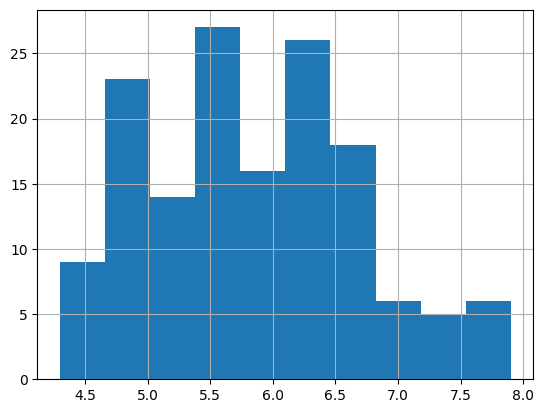

In [53]:
iris_df['sepal_length'].hist()

<Axes: >

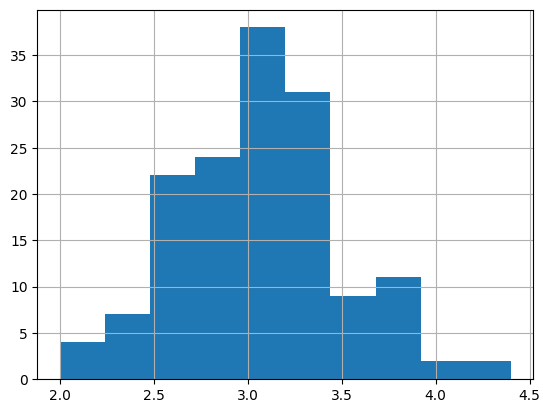

In [54]:
iris_df['sepal_width'].hist()
# we have normal dist

<Axes: >

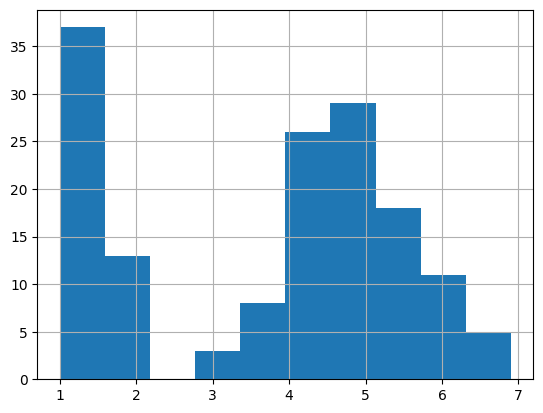

In [55]:
iris_df['petal_length'].hist()

<Axes: >

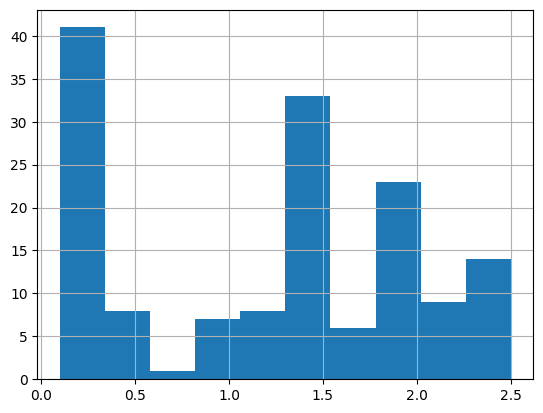

In [56]:
iris_df['petal_width'].hist()

**Scatterplot**

In [57]:
colors=['purple','blue','green']
Species=['Iris-setosa','Iris-versicolor','Iris-virginica']

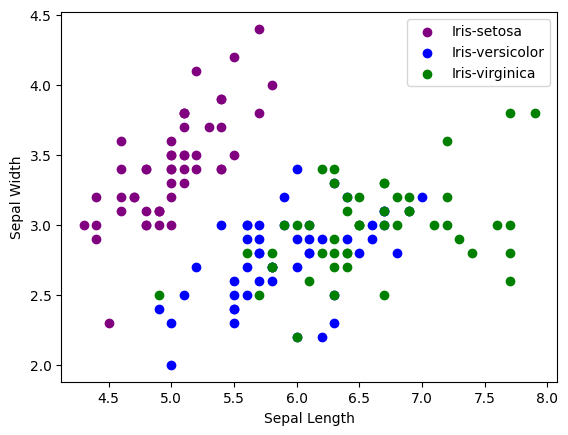

In [58]:
for i in range(3):
  x=iris_df[iris_df['species']==Species[i]]
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Sepal Width")
  plt.legend()

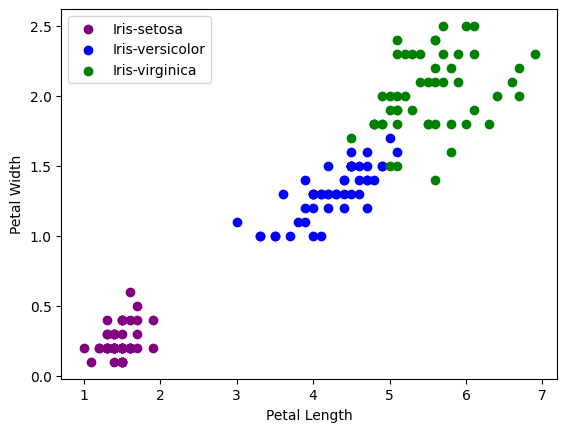

In [59]:
for i in range(3):
  x=iris_df[iris_df['species']==Species[i]]
  plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=Species[i])
  plt.xlabel("Petal Length")
  plt.ylabel("Petal Width")
  plt.legend()

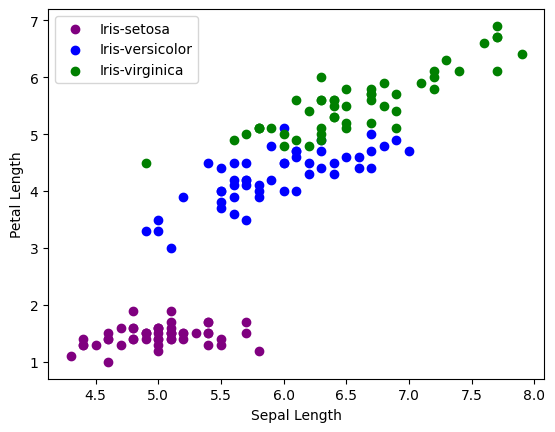

In [60]:
for i in range(3):
  x=iris_df[iris_df['species']==Species[i]]
  plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Length")
  plt.ylabel("Petal Length")
  plt.legend()

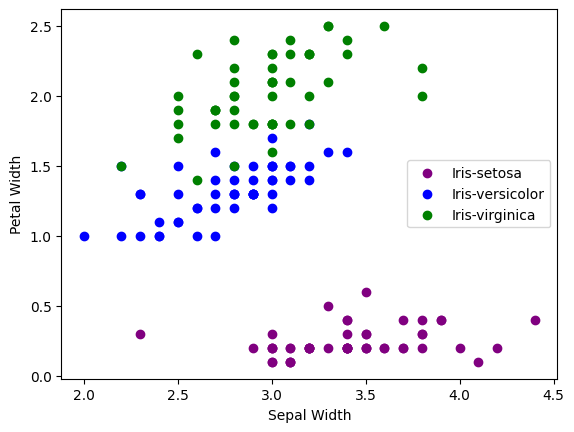

In [61]:
for i in range(3):
  x=iris_df[iris_df['species']==Species[i]]
  plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=Species[i])
  plt.xlabel("Sepal Width")
  plt.ylabel("Petal Width")
  plt.legend()

**Correlation matrix**

In [62]:
iris_df.corr()

<ipython-input-62-1b33314f8075>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-63-caa764f7c33b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=iris_df.corr()


<Axes: >

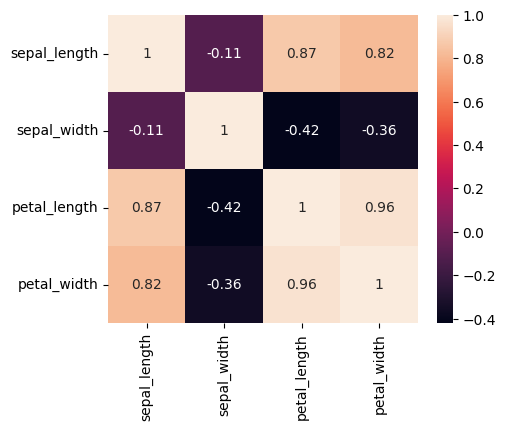

In [63]:
corr=iris_df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax)
# or sns.heatmap(corr,annot=True,ax=ax , cmap='coolwarm')
#annot=true , adds actual values to heatmap cells
#eventough we have positive correlation 0.96 , there is no need to neglect as we have only 4 variables

**Label Encoder**

Converting labels of string format to numerical format so that machine learning models can understand

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [65]:
iris_df['species']=le.fit_transform(iris_df['species'])
iris_df['species'].head()


0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [66]:
iris_df['species'].tail()

145    2
146    2
147    2
148    2
149    2
Name: species, dtype: int64

**Model Training**

In [67]:
from sklearn.model_selection import train_test_split
#train -70
#test -30
X=iris_df.drop(columns=['species'])
Y=iris_df['species']
print(X)
print(Y)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [68]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=2,stratify=Y)

In [69]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [70]:
#training the data
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**Accuracy Evaluation**

In [71]:
from sklearn.metrics import accuracy_score
#accuracy on training data
x_train_prediction=model.predict(x_train)
accuracy=accuracy_score(x_train_prediction,y_train)
print("Accuracy on training data ",accuracy*100)

Accuracy on training data  96.19047619047619


In [72]:
#accuracy on testing data
x_test_prediction=model.predict(x_test)
accuracy=accuracy_score(x_test_prediction,y_test)
print("Accuracy on testing data ",accuracy*100)

Accuracy on testing data  100.0


In [73]:
#knn -k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()


In [74]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [75]:
print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  97.77777777777777


**Making a Predictive System**

In [76]:
input_data=[6.7,3,5.2,2.3]
#changing input data to numpy array
input_data_as_array=np.asarray(input_data)
#reshape the array as we are predicting for one instance
input_data_reshaped=input_data_as_array.reshape(1,-1)
print(input_data_reshaped)
prediction=model.predict(input_data_reshaped)
print(prediction)



[[6.7 3.  5.2 2.3]]
[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [77]:
if(prediction[0]==0):
  print("The species belongs to Iris Setosa")
elif(prediction[0]==1):
  print("The species belongs to Iris-Versicolour")
else:
  print("The species belongs to Iris-Virginica")

The species belongs to Iris-Virginica
